In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

In [8]:
aqi = pd.read_csv('aqi_cleaned.csv')
aqi

,Max AQI,90th Percentile AQI,Median AQI,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10,County_State
0,80,52,37,0.874539,0.000000,0.000000,0.0,0.0,0.000000,0.188192,0.000000,"Baldwin, AL"
1,67,50,30,0.906542,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,"Clay, AL"
2,61,47,37,0.958175,0.000000,0.000000,0.0,0.0,0.000000,0.133080,0.000000,"Colbert, AL"
3,90,51,39,0.897507,0.000000,0.000000,0.0,0.0,0.000000,0.083102,0.000000,"DeKalb, AL"
4,100,50,39,0.912281,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,"Elmore, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,200,71,46,0.728767,0.021918,0.008219,0.0,0.0,0.000000,0.005479,0.000000,"Sublette, WY"
1011,133,64,46,0.717808,0.008219,0.000000,0.0,0.0,0.010959,0.013699,0.095890,"Sweetwater, WY"
1012,87,51,43,0.893151,0.000000,0.000000,0.0,0.0,0.000000,0.010959,0.005479,"Teton, WY"
1013,101,58,44,0.863014,0.002740,0.000000,0.0,0.0,0.002740,0.000000,0.010959,"Uinta, WY"


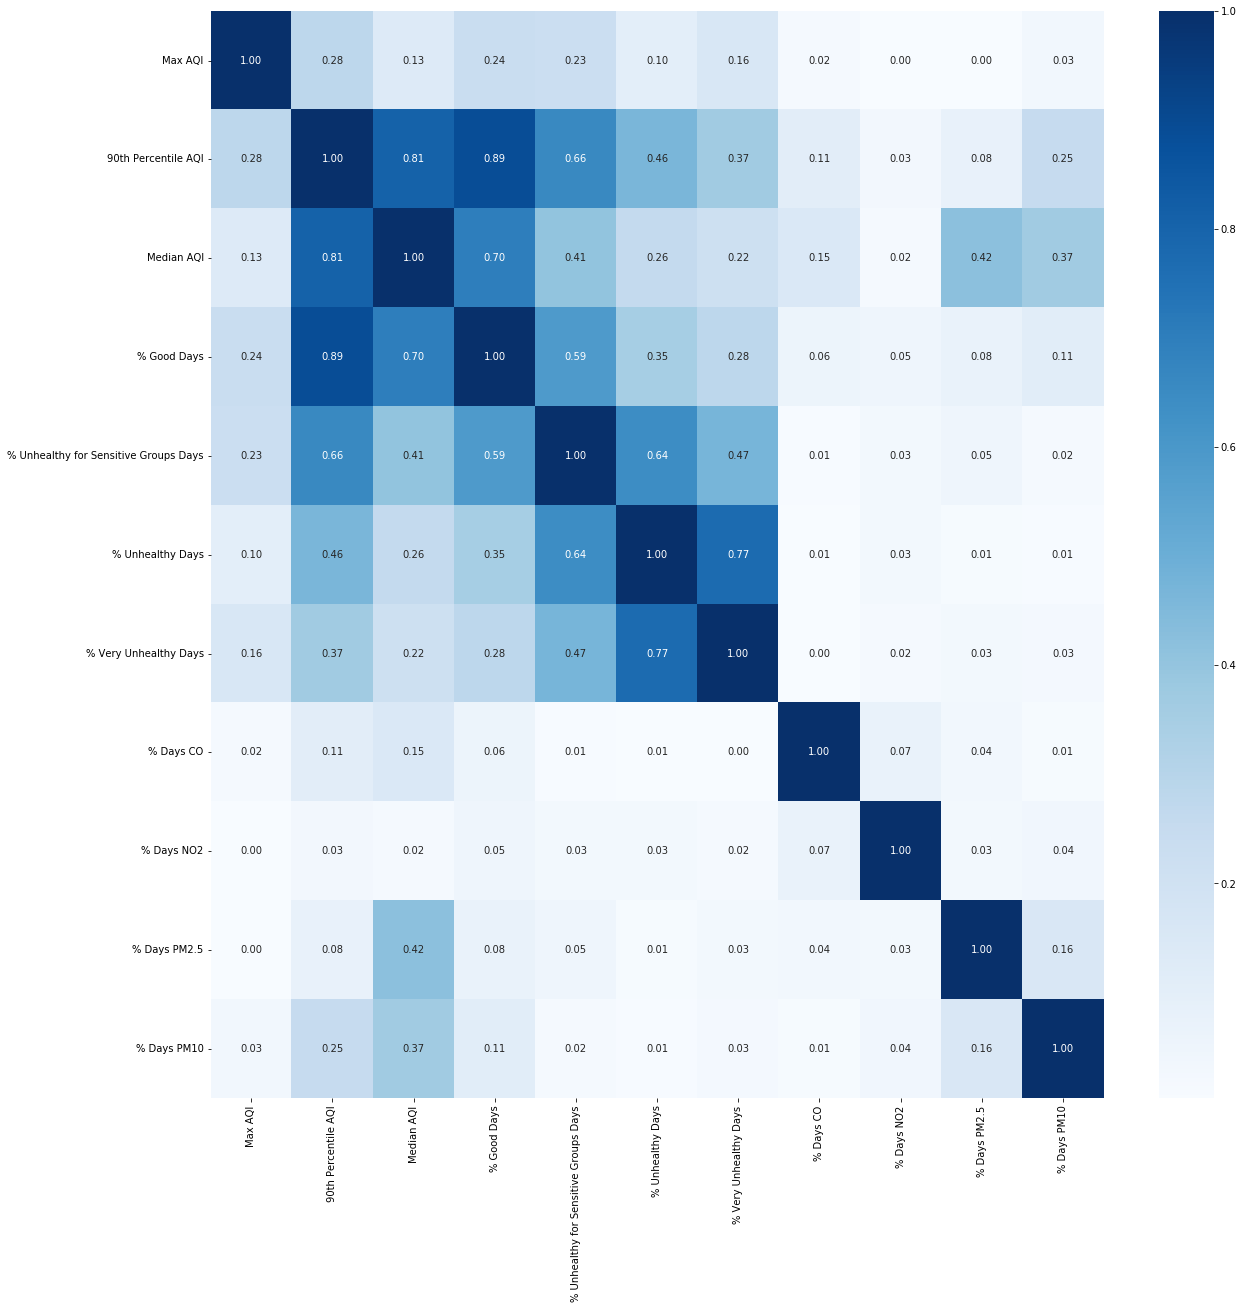

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(aqi.iloc[:,:13].corr()),annot=True, fmt=".2f",cmap='Blues');

In [10]:
demo = pd.read_csv('model_data_V1.csv')
demo

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]",Log Population Density (per sqmi),"% Household Size | 1-person household, 2021 [Estimated]","% Household Size | 2-person household, 2021 [Estimated]","% Household Size | 3-person household, 2021 [Estimated]","% Household Size | 4-person household, 2021 [Estimated]","% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]"
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.172737,3.904616,0.322195,0.413428,0.090814,0.110925,0.037394,0.007437,0.4790,0.018942
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.145731,4.561972,0.237690,0.321698,0.158837,0.143103,0.090112,0.032961,0.4791,0.034838
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.194525,4.278354,0.290439,0.371741,0.157603,0.080609,0.050535,0.023844,0.4480,0.095448
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.382892,6.114383,0.315286,0.346197,0.138452,0.109892,0.056727,0.019380,0.4615,0.086253
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.179435,2.491435,0.306025,0.403252,0.120816,0.085751,0.031240,0.031878,0.4298,0.025742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.150731,3.652016,0.214115,0.352553,0.144363,0.131406,0.090699,0.039721,0.4429,0.651439
3216,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.225747,1.434537,0.214717,0.454041,0.097467,0.109771,0.069481,0.032569,0.4235,0.249068
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.123845,2.665824,0.231796,0.281321,0.117368,0.205789,0.070782,0.045907,0.5641,0.945810
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.098139,2.232098,0.124038,0.312611,0.211368,0.129070,0.136471,0.049438,0.4146,0.936978


In [11]:
str_to_remove = [' CITY COUNTY',' COUNTY',' PARISH',' MUNICIPIO',' MUNICIPALITY',' CENSUS AREA',' CITY AND BOROUGH',' BOROUGH']
for target in str_to_remove:
    demo['Name'] = demo['Name'].str.upper().str.replace(target,'')
demo['Name']

0       ABBEVILLE, SC
1          ACADIA, LA
2        ACCOMACK, VA
3             ADA, ID
4           ADAIR, IA
            ...      
3215         YUMA, AZ
3216         YUMA, CO
3217       ZAPATA, TX
3218       ZAVALA, TX
3219      ZIEBACH, SD
Name: Name, Length: 3220, dtype: object

In [12]:
aqi['County_State'] = aqi['County_State'].str.upper()
aqi['County_State']

0          BALDWIN, AL
1             CLAY, AL
2          COLBERT, AL
3           DEKALB, AL
4           ELMORE, AL
             ...      
1010      SUBLETTE, WY
1011    SWEETWATER, WY
1012         TETON, WY
1013         UINTA, WY
1014        WESTON, WY
Name: County_State, Length: 1015, dtype: object

In [13]:
model_v2_inner_merged = demo.merge(aqi,left_on='Name',right_on='County_State').drop(['County_State','Name','FIPS'],axis=1)
for c in model_v2_inner_merged.columns:
    model_v2_inner_merged[c].fillna(value=model_v2_inner_merged[c].median(), inplace=True)
model_v2_inner_merged.to_csv('model_v2_inner_merged.csv',index=False)

In [14]:
model_v2 = demo.merge(aqi,left_on='Name',right_on='County_State',how='left')
print(model_v2[model_v2['# Total Population, 2020 [Estimated]'].isna()]['County_State'])
model_v2 = model_v2.drop(['County_State','Name'],axis=1)
model_v2

2647    NaN
2983    NaN
Name: County_State, dtype: object


,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,90th Percentile AQI,Median AQI,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,53.0,38.0,0.868493,0.000000,0.0,0.0,0.0,0.021918,0.306849,0.013699
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,67.0,45.0,0.726027,0.008219,0.0,0.0,0.0,0.000000,0.115068,0.136986
3216,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
model_v2.drop(['FIPS'],axis=1).to_csv('model_v2_with_NaNs.csv',index=False)

In [16]:
for c in model_v2.columns:
    model_v2[c].fillna(value=model_v2[c].median(), inplace=True)
model_v2

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,90th Percentile AQI,Median AQI,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,53.0,38.0,0.868493,0.000000,0.0,0.0,0.0,0.021918,0.306849,0.013699
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,67.0,45.0,0.726027,0.008219,0.0,0.0,0.0,0.000000,0.115068,0.136986
3216,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000
3217,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000
3218,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,53.0,37.0,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000


In [17]:
model_v2.drop(['FIPS'],axis=1).to_csv('model_v2.csv',index=False)

In [18]:
model_v2['FIPS']

0       45001
1       22001
2       51001
3       16001
4       19001
        ...  
3215     4027
3216     8125
3217    48505
3218    48507
3219    46137
Name: FIPS, Length: 3220, dtype: int64

In [19]:
elec = pd.read_csv('election_data.csv')
elec

,index,DEMOCRAT,REPUBLICAN
0,1001,0.237697,0.727666
1,1003,0.193856,0.765457
2,1005,0.465278,0.520967
3,1007,0.212496,0.764032
4,1009,0.084258,0.893348
...,...,...,...
3149,56037,0.188616,0.709515
3150,56039,0.579235,0.310525
3151,56041,0.141913,0.726564
3152,56043,0.139486,0.763241


In [20]:
model_v3 = model_v2.merge(elec,left_on='FIPS',right_on='index')
model_v3 = model_v3.drop(['FIPS','index'],axis=1).rename(columns = {'DEMOCRAT':'% Democrat - 2016','REPUBLICAN':'% Republican - 2016'})
model_v3

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,% Good Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Days CO,% Days NO2,% Days PM2.5,% Days PM10,% Democrat - 2016,% Republican - 2016
0,24494.0,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.347193,0.627657
1,62669.0,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.205849,0.772646
2,32525.0,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.426097,0.542610
3,465948.0,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,...,0.868493,0.000000,0.0,0.0,0.0,0.021918,0.306849,0.013699,0.386760,0.479136
4,6965.0,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.297297,0.645762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,76999.0,0.079274,0.076598,0.040247,0.022948,0.072546,0.157742,0.123716,0.102352,0.112664,...,0.726027,0.008219,0.0,0.0,0.0,0.000000,0.115068,0.136986,0.464158,0.474722
3110,5282.0,0.092389,0.060962,0.043165,0.022151,0.053578,0.135933,0.113593,0.095418,0.136691,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.151534,0.803590
3111,210821.0,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.656588,0.327498
3112,9970.0,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,...,0.875000,0.000000,0.0,0.0,0.0,0.000000,0.309589,0.000000,0.776207,0.204358


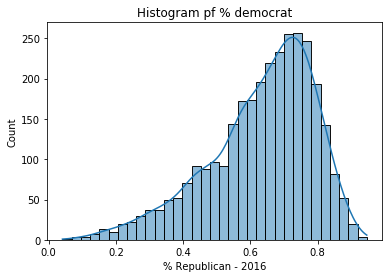

In [21]:
sns.histplot(model_v3.loc[:,'% Republican - 2016'],kde=True)
plt.title('Histogram pf % democrat');

In [22]:
model_v3.loc[:,['% Republican - 2016','% Democrat - 2016']].corr()

,% Republican - 2016,% Democrat - 2016
% Republican - 2016,1.00000,-0.98095
% Democrat - 2016,-0.98095,1.00000


In [23]:
model_v3 = model_v3.drop('% Republican - 2016',axis=1)

In [24]:
model_v3.columns[model_v3.columns.str.contains('Density')]

Index(['Log Population Density (per sqmi)'], dtype='object')

In [25]:
# model_v3[model_v3['Max AQI'].isna()]['index']

In [26]:
model_v3.to_csv('model_v3.csv',index=False)